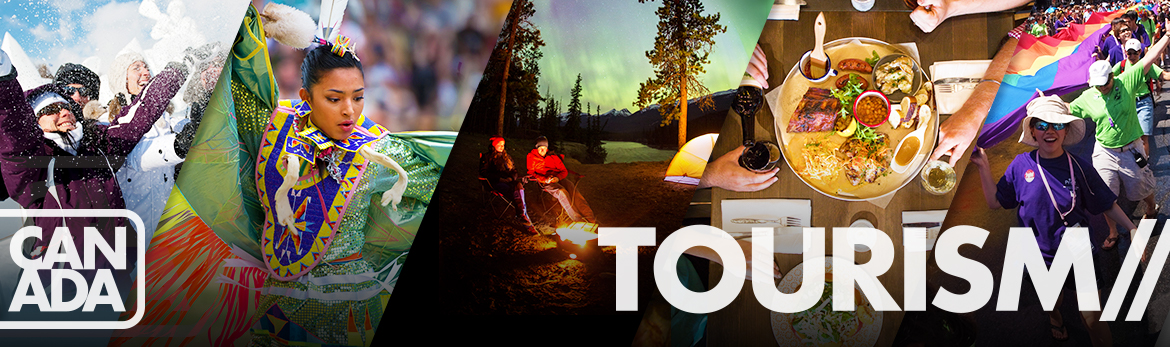

<div align="right"><font color=grey size=2>Image © Government of Canada</font></div>

# Domestic Tourism in Census Metropolitan Areas

## 1. Overview

I have conducted an exploratory data analysis on the data set of <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2410003001">Travel Survey of Residents of Canada</a>
 from <a href="https://www150.statcan.gc.ca/n1//en/type/data?MM=1">Statistics Canada</a> to understand the data structure and summarize the following points:
    
1. Top 10 destinations (Census Metropolitan Areas) by visitation and expenditure in 2017 
2. Growth in domestic visitation and tourism expenditures from 2011 to 2017

In [3]:
#First, let's install a Python library with conda for reading data from Statistics Canada:
#conda install -c ian.e.preston stats_can

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stats_can import StatsCan

sc = StatsCan()

In [4]:
#Source: Table: 24-10-0030-01, Statistics Canada
data = sc.table_to_df("24-10-0030-01")

In [5]:
data.head()

,REF_DATE,GEO,DGUID,Visit duration,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Number of census metropolitan areas (CMA) visits,Number of visits,228,thousands,3,v88856249,1.1.1,1166.0,B,NaN,NaN,0
1,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Visits expenditures,Dollars,81,thousands,3,v88856250,1.1.2,324276.0,B,NaN,NaN,0
2,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Nights,Nights,225,thousands,3,v88856251,1.1.3,1776.0,B,NaN,NaN,0
3,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,Same day census metropolitan areas (CMA) visits,Number of census metropolitan areas (CMA) visits,Number of visits,228,thousands,3,v88856252,1.2.1,636.0,B,NaN,NaN,0
4,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,Same day census metropolitan areas (CMA) visits,Visits expenditures,Dollars,81,thousands,3,v88856253,1.2.2,61267.0,C,NaN,NaN,0


There are 1617 rows and 16 columns in the dataset and no missing values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 0 to 1616
Data columns (total 16 columns):
REF_DATE           1617 non-null datetime64[ns]
GEO                1617 non-null category
DGUID              1617 non-null category
Visit duration     1617 non-null object
Characteristics    1617 non-null object
UOM                1617 non-null category
UOM_ID             1617 non-null category
SCALAR_FACTOR      1617 non-null category
SCALAR_ID          1617 non-null category
VECTOR             1617 non-null category
COORDINATE         1617 non-null category
VALUE              1617 non-null float64
STATUS             1617 non-null category
SYMBOL             0 non-null category
TERMINATED         0 non-null category
DECIMALS           1617 non-null category
dtypes: category(12), datetime64[ns](1), float64(1), object(2)
memory usage: 112.7+ KB


## 1.1 Categorical Variables

#### Year

The dataset contains the years from 2011 to 2017. 

In [7]:
data['YEAR'] = pd.DatetimeIndex(data['REF_DATE']).year

data['YEAR'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

#### Area

There are 33 census metropolitan areas (CMA) in Canada in the dataset. Did CMA include cities of three territories? Let's have a look:

In [8]:
data['GEO'].nunique()

33

In [9]:
Territories = ['Yukon', ' Northwest', 'Nunavut']

len(data[data['GEO'].str.contains('|'.join(Territories), case = False)])

0

Now we are sure that the three territories are not considered as CMA. Here is a destination list and there are ten regions including Ontario/Quebec. Prince Edward Island Province was excluded in the data of CMA.

In [10]:
data['GEO'].unique().tolist()

["St. John's, Newfoundland and Labrador",
 'Halifax, Nova Scotia',
 'Moncton, New Brunswick',
 'Saint John, New Brunswick',
 'Saguenay, Quebec',
 'Québec, Quebec',
 'Sherbrooke, Quebec',
 'Trois-Rivières, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario/Quebec',
 'Kingston, Ontario',
 'Peterborough, Ontario',
 'Oshawa, Ontario',
 'Toronto, Ontario',
 'Hamilton, Ontario',
 'St. Catharines-Niagara, Ontario',
 'Kitchener, Ontario',
 'Brantford, Ontario',
 'Guelph, Ontario',
 'London, Ontario',
 'Windsor, Ontario',
 'Barrie, Ontario',
 'Greater Sudbury, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Calgary, Alberta',
 'Edmonton, Alberta',
 'Kelowna, British Columbia',
 'Abbotsford, British Columbia',
 'Vancouver, British Columbia',
 'Victoria, British Columbia']

In [11]:
data['Province'] = data['GEO'].apply(lambda x: x.split(', ')[1])

province_area = data['Province'].unique().tolist()

province_area

['Newfoundland and Labrador',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario/Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia']

#### Characteristics

There’s three types of values in *Characteristics*: number of visits, expenditures and nights.

In [12]:
data['Characteristics'].unique()

array(['Number of census metropolitan areas (CMA) visits',
       'Visits expenditures', 'Nights'], dtype=object)

#### Visit Duration

The data can be categorized by the type of visit: same-day, overnight, and the total. 

In [13]:
data['Visit duration'].unique()

array(['All census metropolitan areas (CMA)  visits',
       'Same day census metropolitan areas (CMA)  visits',
       'Overnight census metropolitan areas (CMA)  visits'], dtype=object)

## 1.2 Numerical Variables

#### Value

The *Value* variable has terrificly high standard deviation. If going back to check the table, we may find the variable is corresponding to the type of *Characteristics* and *Visit duration*, and thus has a different unit, which needs our further analysis.

In [14]:
data['VALUE'].describe()

count    1.617000e+03
mean     2.428424e+05
std      5.903349e+05
min      1.090000e+02
25%      1.621000e+03
50%      7.144000e+03
75%      2.026450e+05
max      5.568671e+06
Name: VALUE, dtype: float64

## 2. The questions I am curious about

### 2.1 Top 10 destinations visited by Canadian residents in 2017

The following bar plots illustrate that the top three destinations visited by Canadian residents in 2017 for either overnight or same-day trips are the same: Toronto, Montreal and Ottawa-Gatineau. 

It is not coincident that nine out of ten destinations of top domestic visitation have <a href="https://en.wikipedia.org/wiki/List_of_international_airports_in_Canada">international airports</a>. The international airports contribute to overnight domestric trips from the following aspects:

1. Due to the capacity, the international airports are able to accommodate more domestic flights, which means more options for domestic visitors;
2. The international airports are essentially located in the cities with relatively high population density.

The top 10 destinations for overnight trips are more diversified in locations than the destinations for same day trips. Five out of ten as overnight trip destinations are outside of Ontario and Quebec while only two out of ten as same-day trip destinations are outside of these two provinces, that is, Vancouver and Edmonton.

In [15]:
num_overnight_2017 = data[(data['YEAR'] == 2017) &
                     (data['Visit duration'] == 'Overnight census metropolitan areas (CMA)  visits') &
                     (data['Characteristics'] == 'Number of census metropolitan areas (CMA) visits')]

top10_overnight = num_overnight_2017.nlargest(10, ['VALUE']).reset_index()

num_SameDay = data[(data['YEAR'] == 2017) &
                   (data['Visit duration'] == 'Same day census metropolitan areas (CMA)  visits') &
                   (data['Characteristics'] == 'Number of census metropolitan areas (CMA) visits')]

top10_SameDay = num_SameDay.nlargest(10, ['VALUE']).reset_index()

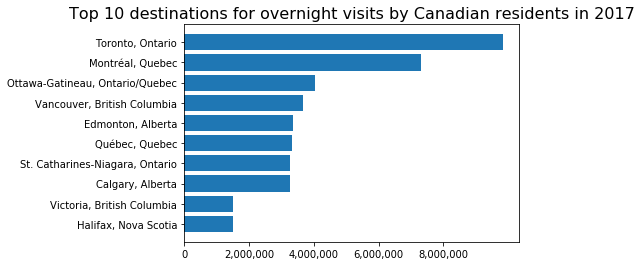

In [16]:
Value, City = zip(*sorted(zip(top10_overnight['VALUE']*1000, top10_overnight['GEO'])))
plt.barh(City, Value)

plt.title('Top 10 destinations for overnight visits by Canadian residents in 2017', fontsize = 16)
plt.xticks(np.arange(0, 10000000, 2000000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

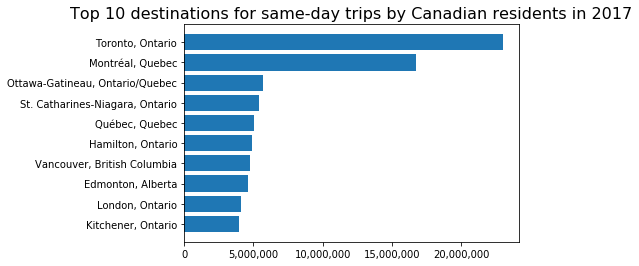

In [17]:
Value, City = zip(*sorted(zip(top10_SameDay['VALUE']*1000, top10_SameDay['GEO'])))
plt.barh(City, Value)

plt.title('Top 10 destinations for same-day trips by Canadian residents in 2017', fontsize = 16)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In fact, the eight destinations in Ontario and Quebec for same-day trips are geographically clustered. For example, the driving time from Toronto to other destinations in Ontario ranges from one to two hours. It takes around six hours to drive from Toronto to Montreal while Montreal is only three-hour driving distance from Quebec City.

In addition, these eight destinations are connected by VIA Rail as part of the Québec City–Windsor Corridor. Definitely, the Corridor railway as well as highways provided more tranportation selections and convenience to the same-day visitors to the destinations in Ontario and Quebec. 

<img src="ONTARIO-QU%C3%89BEC-corridor.png" width="280" />

<div align="center"><font color=grey size=2>Image © VIA Rail Canada</font></div>

### 2.2 Top 10 destinations visited for expenditures by Canadian residents in 2017

Tourist expenditure is an important measure of both domestic and international tourism demands. In the Canadian domestic tourism in 2017, the top three destinations for spending by over-night domestic visitors were Toronto, Vancouver, and Montreal. Kelowna and Victoria were also in the list in terms of tourist expenditure by overnight visitors.

In [18]:
expense_overnight = data[(data['YEAR'] == 2017) &
                         (data['Visit duration'] == 'Overnight census metropolitan areas (CMA)  visits') &
                         (data['Characteristics'] == 'Visits expenditures')]

top10_expense_overnight = expense_overnight.nlargest(10, ['VALUE']).reset_index()

expense_SameDay = data[(data['YEAR'] == 2017) &
                       (data['Visit duration'] == 'Same day census metropolitan areas (CMA)  visits') &
                       (data['Characteristics'] == 'Visits expenditures')]

top10_expense_SameDay = expense_SameDay.nlargest(10, ['VALUE']).reset_index()

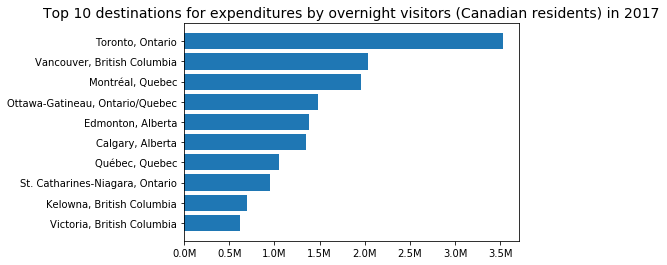

In [19]:
Value, City = zip(*sorted(zip(top10_expense_overnight['VALUE']/1000000, top10_expense_overnight['GEO'])))
plt.barh(City, Value)

plt.title('Top 10 destinations for expenditures by overnight visitors (Canadian residents) in 2017', fontsize = 14)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{}M".format(x)))

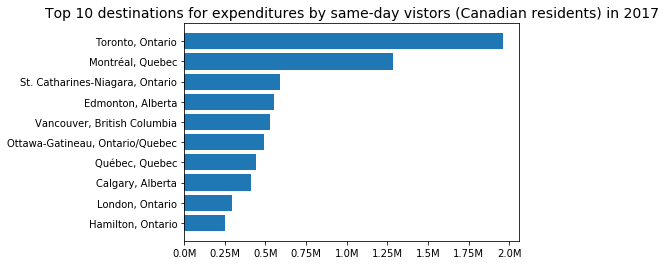

In [20]:
Value, City = zip(*sorted(zip(top10_expense_SameDay['VALUE']/1000000, top10_expense_SameDay['GEO'])))
plt.barh(City, Value)

plt.title('Top 10 destinations for expenditures by same-day vistors (Canadian residents) in 2017', fontsize = 14)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{}M".format(x)))

### 2.3 Where did overnight visitors spend most per trip in 2017? 

In general, overnight trips cost people more than same-day trips. I am interested in the destinations where the overnight visitors spend most per trip.

Suprisely, St. John's ranked the top in the list of 2017. Canadian residents spent around CAD$700 on average each trip to St. John's and they also spent more on the overnight trips to Kelowna and Vancouver than the rest of destinations.

What caused them to spend more money per trip to these CMAs? Was that because tourist costs such as accomodation, transportation, food etc. were generally more expensive in the destinations than others? Or were there more appealing attractions to induce people to spend money? It would be an insteresting topic to dive deep in given more data.

Text(0.5, 1.0, 'Top 10 expensive destinations for spending per trip by overnight visitors (Canadian residents) in 2017')

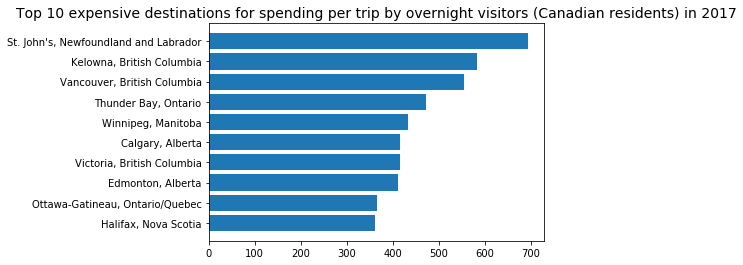

In [21]:
num_overnight_2017 = num_overnight_2017[['GEO', 'VALUE']]
expense_overnight = expense_overnight[['GEO', 'VALUE']]
df_expense = expense_overnight.merge(num_overnight_2017, on = 'GEO', suffixes=('_expense', '_num'))
df_expense['per_trip'] = round(df_expense['VALUE_expense']/df_expense['VALUE_num'], 2)

top10_overnight_expense_per_trip = df_expense.nlargest(10, ['per_trip'])
top10_overnight_expense_per_trip

Expense, City = zip(*sorted(zip(top10_overnight_expense_per_trip['per_trip'], top10_overnight_expense_per_trip['GEO'])))
plt.barh(City, Expense)

plt.title('Top 10 expensive destinations for spending per trip by overnight visitors (Canadian residents) in 2017', fontsize = 14)

### 2.4 Growth of overnight visits and the corresponding tourist expenditures from 2011 to 2017

Speaking of the growth percentage of the overnight visits by Canadian resident, most destinations on the top 10 list are the second- or third-tier Canadian cities. They had relatively low visitation in 2011 as a base compared to the first-tier cities such as Toronto.

Calgary, the St. Catherines-Niagara region and Victoria had great performance in the eight years even though they had much more visitations in magnitudes than other destinations in the list. In addition, Kelowna and St. Catherines-Niagara region are more well-known as the wine touring regions in the recent years.

In [22]:
num_overnight_2011 = data[(data['YEAR'] == 2011) &
                          (data['Visit duration'] == 'Overnight census metropolitan areas (CMA)  visits') &
                          (data['Characteristics'] == 'Number of census metropolitan areas (CMA) visits')]
num_overnight_2011 = num_overnight_2011[['GEO', 'VALUE']]

df_1117 = num_overnight_2011.merge(num_overnight_2017, on = 'GEO', suffixes=('_2011', '_2017'))
df_1117['growth'] = (df_1117['VALUE_2017'] - df_1117['VALUE_2011'])/df_1117['VALUE_2011']
df_1117.sort_values(by = 'growth', ascending = False).reset_index(drop = True)[:10]

,GEO,VALUE_2011,VALUE_2017,growth
0,"Brantford, Ontario",198.0,360.0,0.818182
1,"Kingston, Ontario",869.0,1459.0,0.678941
2,"Kelowna, British Columbia",765.0,1191.0,0.556863
3,"Sherbrooke, Quebec",876.0,1312.0,0.497717
4,"Saguenay, Quebec",601.0,821.0,0.366057
5,"Trois-Rivières, Quebec",532.0,661.0,0.242481
6,"Calgary, Alberta",2641.0,3252.0,0.231352
7,"St. Catharines-Niagara, Ontario",2688.0,3266.0,0.215030
8,"Victoria, British Columbia",1245.0,1500.0,0.204819
9,"Saint John, New Brunswick",281.0,330.0,0.174377


Please note that the year of 2017 was the 150th anniversary of Canada and <a href="https://www.nytimes.com/interactive/2017/travel/places-to-visit.html">The New York Times</a> named Canada its top travel destination for 2017. We may figure out the annual growth rates from 2011 to 2017 as an alternative way to compare the data in 2017 with others and explore if there were any significant changes in visitation and expenditure.

More intuitively, the following bar chart animation showcases the general growth trend of the top destionations by expenditure for overnight visits during the eight years. Please note that the *ipynb* version on Github only shows a static chart instead.

In [23]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

colors = dict(zip(province_area,
                  ['paleturquoise', 'paleturquoise', 'paleturquoise',   # Atlantic provinces
                   'lightsteelblue', 'lightsteelblue', 'lightsteelblue', #Prairie Provinces
                   'khaki', 'khaki', 'khaki', #Prairie Provinces
                   'palegreen']  #BC
))

df_expense = data[(data['Visit duration'] == 'Overnight census metropolitan areas (CMA)  visits') & 
                  (data['Characteristics'] == 'Visits expenditures')]

def draw_barchart(year):
    df = df_expense[df_expense['YEAR'].eq(year)].sort_values(by = 'VALUE', ascending = True).tail(10)
    group_lk = df.set_index('GEO')['Province'].to_dict()
    ax.clear()
    ax.barh(df['GEO'], df['VALUE']*1000, color = [colors[group_lk[x]] for x in df['GEO']])
    dx = df['VALUE'].max()/200
    for i, (value, name) in enumerate(zip(df['VALUE']*1000, df['GEO'])):
        ax.text(value-dx, i,     name,           size = 12, weight = 600, ha = 'right', va = 'bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size = 12, ha = 'left',  va ='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform = ax.transAxes, color = '#777777', size = 46, ha = 'right', weight = 600)
    ax.text(0, 1.06, 'Expenditure', transform = ax.transAxes, size = 12, color = '#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis = 'x', colors = '#777777', labelsize = 12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which = 'major', axis = 'x', linestyle = '-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 10 destinations of expenditures by overnight Canadian visitors from 2011 to 2017',
            transform = ax.transAxes, size = 20, weight = 400, ha = 'left')
    ax.text(1, 0, 'by @vcai01, credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color = '#777777', bbox = dict(facecolor='white', alpha = 0.8, edgecolor = 'white'))
    plt.box(False)

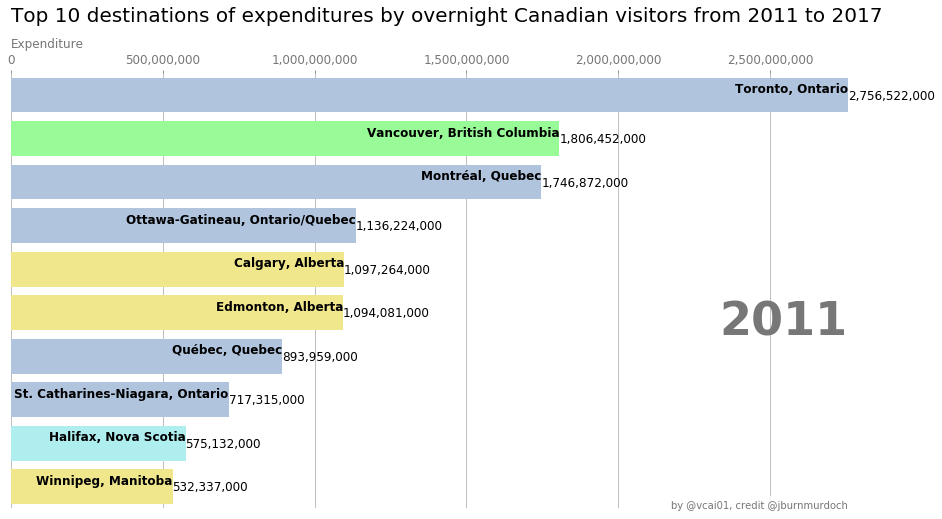

In [24]:
fig, ax = plt.subplots(figsize = (15, 8))
animator_expense = animation.FuncAnimation(fig, draw_barchart, frames = range(2011, 2018), interval = 800)

HTML(animator_expense.to_jshtml()) 

The visitation and expenditures were annual data. If the monthly data was available, we may use time series models to analyze the trend and cyclic patterns and forcast the domestic visitation and expenditures in the short term.